In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from os.path import isfile
warnings.filterwarnings("ignore")

import scienceplots
plt.style.use('science')
import seaborn as sns

# FONTS
import sys
from os.path import abspath
source_path = abspath('..')
if not source_path in sys.path:
    sys.path.append(source_path)
from font import SETTINGS
for key in SETTINGS:
    plt.rc(key, **SETTINGS[key])

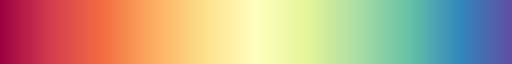

In [2]:
_cmap = plt.get_cmap('Spectral')
_cmap

In [3]:
cmap = _cmap(np.linspace(1, 0, 10)) # start with blue, end with red
len(cmap)

10

In [4]:
COLOR = plt.rcParams['axes.prop_cycle']
COLOR = [v for elem in list(COLOR) for _, v in elem.items()]
COLOR

['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']

In [5]:
FIGURE_FORMAT = 'pdf'
# FIGURE_FORMAT = 'png'

In [6]:
PREFIX = 'wor'

# 0. Load & Preprocess CSV

In [7]:
csv_path = '../loss_overview.csv'
assert isfile(csv_path)

In [8]:
df = pd.read_csv(csv_path)
df.head()

,name,test_loss (~),test_loss,test_perplexity,lm-eval-avg-acc,lm-eval-avg-acc-std,-,-.1,-.2,-.3,...,O.Smax,O.Smin/Smax,O.logits_mean_mean,O.logits_mean_std,O.logits_std_mean,O.logits_std_std,O.logits_mean_absmean,O.logits_mean_absmax,H.mean_logsqZ,time
0,wor40A-16M-13p1B-100k-bs64-lr10-baseline-g0e+0...,3.881,3.881,48.461,NaN,NaN,-,-,-,-,...,522.03,0.36%,-1.3906,2.8594,8.4375,0.2871,7.0000,20.875,328.0,4879.6
1,wor40A-16M-13p1B-100k-bs64-lr100-baseline-g0e+...,3.841,3.841,46.556,NaN,NaN,-,-,-,-,...,4761.38,0.13%,16.5000,3.5312,22.2500,0.5352,23.3750,40.500,1720.0,4872.2
2,wor40A-16M-13p1B-100k-bs64-lr1000-baseline-g0e...,4.269,4.269,71.421,NaN,NaN,-,-,-,-,...,42230.91,0.12%,588.0000,4.6875,139.0000,0.9297,588.0000,604.000,389120.0,4869.3
3,wor40A-16M-13p1B-100k-bs64-lr3-baseline-g0e+00-s1,3.961,3.961,52.487,NaN,NaN,-,-,-,-,...,338.57,0.54%,-6.1562,2.6094,6.1250,0.2178,7.7188,19.250,156.0,4877.4
4,wor40A-16M-13p1B-100k-bs64-lr30-baseline-g0e+0...,3.850,3.850,46.982,NaN,NaN,-,-,-,-,...,1359.49,0.20%,3.8438,3.0938,11.3125,0.3418,9.6875,25.125,600.0,4872.5


In [9]:
df.columns

Index(['name', 'test_loss (~)', 'test_loss', 'test_perplexity',
       'lm-eval-avg-acc', 'lm-eval-avg-acc-std', '-', '-.1', '-.2', '-.3',
       '-.4', 'I.isotropy', 'I.max norm', 'I.avg norm', 'I.min norm',
       'I.mu norm', 'I.ratio norm', 'I.fhs_cos_sim', 'I.fhs_dot_prod',
       'I.eb_cos_sim', '-.5', 'O.isotropy', 'O.max norm', 'O.avg norm',
       'O.min norm', 'O.mu norm', 'O.ratio norm', 'O.max aligndot',
       'O.avg aligndot', 'O.min aligndot', 'O.max aligncos', 'O.avg aligncos',
       'O.min aligncos', 'O.centering_ratio', 'OC.max norm', 'OC.avg norm',
       'OC.min norm', 'OC.mu norm', 'OC.ratio norm', 'OC.max aligndot',
       'OC.avg aligndot', 'OC.min aligndot', 'OC.max aligncos',
       'OC.avg aligncos', 'OC.min aligncos', 'OC.centering_ratio',
       'O.fhs_cos_sim', 'O.fhs_dot_prod', 'O.eb_cos_sim', 'O.eb_dot_sim',
       'O.corr_p(norm, lbp)', 'O.corr_s(norm, lbp)', 'O.corr_p(Emu, lbp)',
       'O.corr_s(Emu, lbp)', 'O.Smin', 'O.Smax', 'O.Smin/Smax',
       'O

In [10]:
KEPT_COLUMNS = [
    'name',
    'O.centering_ratio',
]
DROPPED_COLUMNS = [column for column in df.columns if not column in KEPT_COLUMNS]
df = df.drop(columns=DROPPED_COLUMNS)
df = df[df['name'].str.contains(PREFIX)]
df.head()

,name,O.centering_ratio
0,wor40A-16M-13p1B-100k-bs64-lr10-baseline-g0e+0...,0.818
1,wor40A-16M-13p1B-100k-bs64-lr100-baseline-g0e+...,0.624
2,wor40A-16M-13p1B-100k-bs64-lr1000-baseline-g0e...,0.256
3,wor40A-16M-13p1B-100k-bs64-lr3-baseline-g0e+00-s1,0.969
4,wor40A-16M-13p1B-100k-bs64-lr30-baseline-g0e+0...,0.750


In [11]:
def get_lr(x) -> float:
    _lr = x.split('-lr')[-1].split('-')[0]
    return _lr

def get_wt(x) -> str:
    return str(int("wt-" in x))

df['N'] = df['name'].apply(lambda x: x[3])
df['variant'] = df['name'].apply(lambda x: x[5])
df['lr'] = df['name'].apply(lambda x: get_lr(x))
df.head()

,name,O.centering_ratio,N,variant,lr
0,wor40A-16M-13p1B-100k-bs64-lr10-baseline-g0e+0...,0.818,4,A,10
1,wor40A-16M-13p1B-100k-bs64-lr100-baseline-g0e+...,0.624,4,A,100
2,wor40A-16M-13p1B-100k-bs64-lr1000-baseline-g0e...,0.256,4,A,1000
3,wor40A-16M-13p1B-100k-bs64-lr3-baseline-g0e+00-s1,0.969,4,A,3
4,wor40A-16M-13p1B-100k-bs64-lr30-baseline-g0e+0...,0.750,4,A,30


In [12]:
df_A = df[df['variant'] == 'A']
df_A

,name,O.centering_ratio,N,variant,lr
0,wor40A-16M-13p1B-100k-bs64-lr10-baseline-g0e+0...,0.818,4,A,10
1,wor40A-16M-13p1B-100k-bs64-lr100-baseline-g0e+...,0.624,4,A,100
2,wor40A-16M-13p1B-100k-bs64-lr1000-baseline-g0e...,0.256,4,A,1000
3,wor40A-16M-13p1B-100k-bs64-lr3-baseline-g0e+00-s1,0.969,4,A,3
4,wor40A-16M-13p1B-100k-bs64-lr30-baseline-g0e+0...,0.750,4,A,30
5,wor40A-16M-13p1B-100k-bs64-lr300-baseline-g0e+...,0.657,4,A,300
6,wor40A-16M-13p1B-100k-bs64-lr3000-baseline-g0e...,0.654,4,A,3000
28,wor60A-29M-13p1B-100k-bs64-lr10-baseline-g0e+0...,0.817,6,A,10
29,wor60A-29M-13p1B-100k-bs64-lr100-baseline-g0e+...,0.733,6,A,100
30,wor60A-29M-13p1B-100k-bs64-lr1000-baseline-g0e...,0.304,6,A,1000


> saved as figs/Bratio_histogram_A.pdf


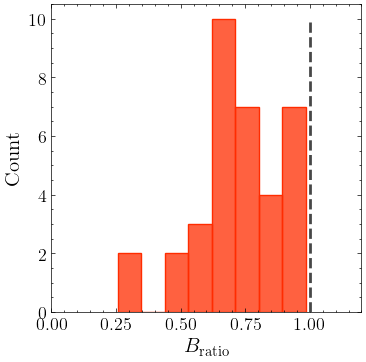

In [13]:
def plot_histogram(_df, save_as=''):

    COLOR_ZERO = COLOR[-2]
    COLOR_HIST = COLOR[3]
    
    _, ax = plt.subplots(1, 1, figsize=(4,4))
    ax = [ax, None]
    
    _ = sns.histplot(x=_df['O.centering_ratio'], ax=ax[0], color=COLOR_HIST, edgecolor=COLOR_HIST)
    _ = ax[0].set_xlabel(r'$B_{\rm ratio}$')
    _ = ax[0].plot([1, 1], [0, 10], marker='', linestyle='--', linewidth=2, color=COLOR_ZERO)
    _ = ax[0].set_xlim([0, 1.2])

    if len(save_as):
        assert save_as.endswith('.pdf') or save_as.endswith('.png')
        fig_path = f'figs/{save_as}'
        plt.savefig(fig_path, format=save_as[-3:], bbox_inches='tight')
        print(f'> saved as {fig_path}')

plot_histogram(df_A, save_as=f'Bratio_histogram_A.{FIGURE_FORMAT}')

In [14]:
def write_tex_table(_df, tex_path):
    rows = []
    for n in ['4', '6', '8', 'A', 'C']:
        row = [n]
        for lr in ['3', '10', '30', '100', '300', '1000', '3000']:
            Bratio = f"{float(_df[_df['N'] == n][_df['lr'] == lr]['O.centering_ratio'].values[0]):.2f}"
            row.append(Bratio)
        row_str = ' & '.join(row)
        rows.append(row_str)
    with open(tex_path, 'w') as f:
        for i, row in enumerate(rows):
            if i < len(rows) - 1:
                f.write(row + ' \\\\ \n ')
            else:
                f.write(row + ' \\\\ \\bottomrule ')
    print(f'> wrote {tex_path}')

write_tex_table(df, tex_path='tables/Bratio.tex')

> wrote tables/Bratio.tex
